# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import textwrap

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
temp_units = "metric"
url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city    
    city_url = url  + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]   
        city_lng = city_weather["coord"]["lon"]   
        city_max_temp = city_weather["main"]["temp_max"]   
        city_humidity = city_weather["main"]["humidity"]   
        city_clouds = city_weather["clouds"]["all"]        
        city_wind = city_weather["wind"]["speed"]          
        city_country = city_weather["sys"]["country"]      
        city_date = city_weather["dt"]  
        
        # Append the City information into city_data list
        city_data.append (
                            {
                                "City": city, 
                                "Lat": city_lat, 
                                "Lng": city_lng, 
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date
                           }
                        )
        
 # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kiama
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | minuri
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | canon city
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | high level
Processing Record 17 of Set 1 | port augusta
Processing Record 18 of Set 1 | menongue
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | kaiyuan
Processing R

City not found. Skipping...
Processing Record 35 of Set 4 | caravelas
Processing Record 36 of Set 4 | antalaha
Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | kaeo
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | chilca
Processing Record 41 of Set 4 | rundu
Processing Record 42 of Set 4 | neiafu
Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | yarmouth
Processing Record 45 of Set 4 | vila
Processing Record 46 of Set 4 | poyarkovo
Processing Record 47 of Set 4 | ravar
Processing Record 48 of Set 4 | araouane
Processing Record 49 of Set 4 | pisco
Processing Record 0 of Set 5 | phan thiet
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | bangkalan
Processing Record 4 of Set 5 | khandbari
Processing Record 5 of Set 5 | sillanwali
Processing Record 6 of Set 5 | bluff
Processing Record 7 of Set 5 | almaznyy
Processing Record 8 of Set 5 | poum
Processing Record 9 o

Processing Record 26 of Set 8 | la troncal
Processing Record 27 of Set 8 | makokou
Processing Record 28 of Set 8 | iqaluit
Processing Record 29 of Set 8 | namibe
Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | batagay-alyta
Processing Record 32 of Set 8 | liberal
Processing Record 33 of Set 8 | novoagansk
Processing Record 34 of Set 8 | ilulissat
Processing Record 35 of Set 8 | iskateley
Processing Record 36 of Set 8 | kulhudhuffushi
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | flinders
Processing Record 39 of Set 8 | ibra
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | goure
Processing Record 42 of Set 8 | kalol
Processing Record 43 of Set 8 | paamiut
Processing Record 44 of Set 8 | alekseyevka
Processing Record 45 of Set 8 | teknaf
Processing Record 46 of Set 8 | barna
Processing Record 47 of Set 8 | asfi
Processing Record 48 of Set 8 | ksenyevka
City not found. Skipping...
Processing Record 49 of S

Processing Record 17 of Set 12 | baryatino
Processing Record 18 of Set 12 | cap-aux-meules
Processing Record 19 of Set 12 | goderich
Processing Record 20 of Set 12 | raton
Processing Record 21 of Set 12 | thessalon
Processing Record 22 of Set 12 | vestmannaeyjar
Processing Record 23 of Set 12 | union
Processing Record 24 of Set 12 | terrace
Processing Record 25 of Set 12 | severodvinsk
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | dzheguta
Processing Record 28 of Set 12 | rantepao
Processing Record 29 of Set 12 | pilao arcado
City not found. Skipping...
Processing Record 30 of Set 12 | diu
Processing Record 31 of Set 12 | samarinda
Processing Record 32 of Set 12 | abashiri
Processing Record 33 of Set 12 | tanout
Processing Record 34 of Set 12 | sistranda
Processing Record 35 of Set 12 | port hardy
Processing Record 36 of Set 12 | ambanja
Processing Record 37 of Set 12 | beruwala
Processing Record 38 of Set 12 | archidona
Processing Record 39 of Se

In [4]:
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=80913234e69296e45dd43131c22cd2ae&units=metric&q=


In [5]:
city_data

[{'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 0.2,
  'Humidity': 73,
  'Cloudiness': 96,
  'Wind Speed': 1.76,
  'Country': 'US',
  'Date': 1678414252},
 {'City': 'kiama',
  'Lat': -34.6833,
  'Lng': 150.8667,
  'Max Temp': 27.99,
  'Humidity': 64,
  'Cloudiness': 0,
  'Wind Speed': 4.87,
  'Country': 'AU',
  'Date': 1678414798},
 {'City': 'hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 21.92,
  'Humidity': 52,
  'Cloudiness': 75,
  'Wind Speed': 8.23,
  'Country': 'AU',
  'Date': 1678414247},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 4.74,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 3.65,
  'Country': 'AR',
  'Date': 1678414244},
 {'City': 'khatanga',
  'Lat': 71.9667,
  'Lng': 102.5,
  'Max Temp': -27.57,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 4.66,
  'Country': 'RU',
  'Date': 1678414257},
 {'City': 'atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 26.74,
  'Humidity': 76,
  'Cloudine

In [6]:
# Convert the cities weather data into a Pandas DataFrame                                 
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,0.20,73,96,1.76,US,1678414252
1,kiama,-34.6833,150.8667,27.99,64,0,4.87,AU,1678414798
2,hobart,-42.8794,147.3294,21.92,52,75,8.23,AU,1678414247
3,ushuaia,-54.8000,-68.3000,4.74,95,100,3.65,AR,1678414244
4,khatanga,71.9667,102.5000,-27.57,94,100,4.66,RU,1678414257


In [7]:
# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.20,73,96,1.76,US,1678414252
1,kiama,-34.6833,150.8667,27.99,64,0,4.87,AU,1678414798
2,hobart,-42.8794,147.3294,21.92,52,75,8.23,AU,1678414247
3,ushuaia,-54.8000,-68.3000,4.74,95,100,3.65,AR,1678414244
4,khatanga,71.9667,102.5000,-27.57,94,100,4.66,RU,1678414257


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

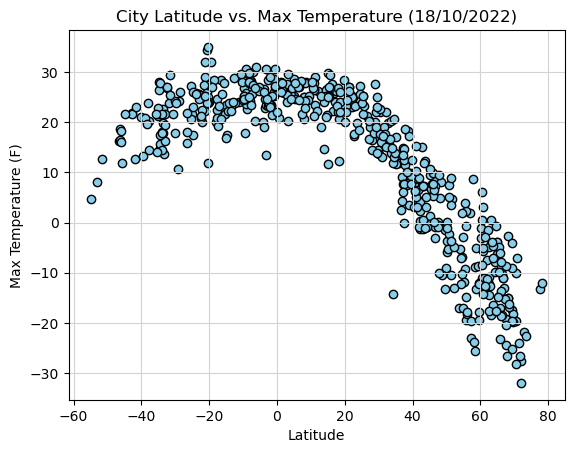

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Max Temperature (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True,  which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("Output_image/Latitude_Vs_Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

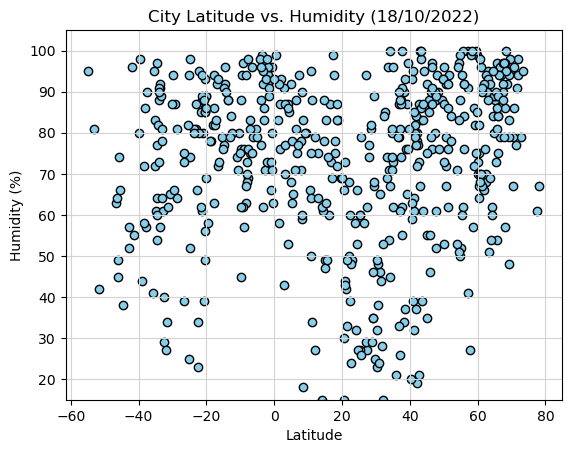

In [11]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")
# Incorporate the other graph properties 
plt.title("City Latitude vs. Humidity (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("Output_image/Latitude_Vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

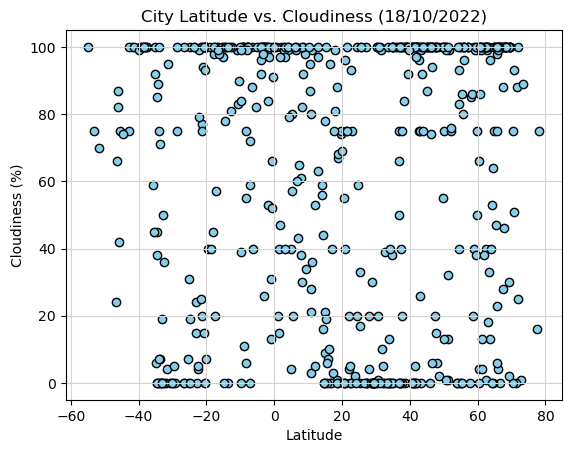

In [12]:
# Build the scatter plots for latitude vs. cloudiness 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Cloudiness (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("Output_image/Latitude_Vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

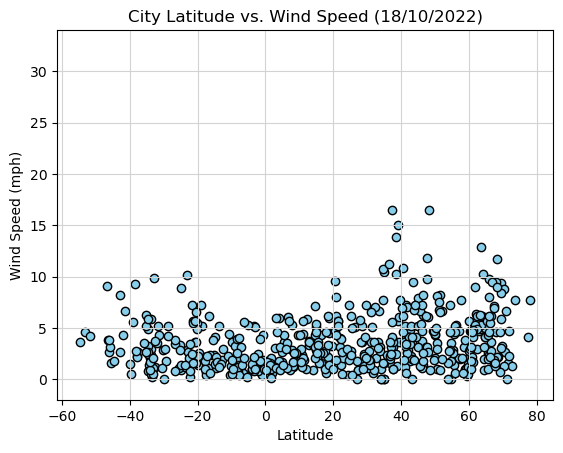

In [13]:
# Build the scatter plots for latitude vs. wind speed 
plt.scatter(city_data_df["Lat"],  city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Wind Speed (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Output_data/Latitude_Vs_Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots 
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get equation of line
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_equation, text_coordinates, fontsize=15,color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")


In [15]:
index13 = city_data_df.loc[13]
index13

City          canon city
Lat               38.441
Lng            -105.2424
Max Temp            7.57
Humidity              37
Cloudiness             0
Wind Speed           3.6
Country               US
Date          1678414799
Name: 13, dtype: object

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.20,73,96,1.76,US,1678414252
4,khatanga,71.9667,102.5000,-27.57,94,100,4.66,RU,1678414257
6,tiksi,71.6872,128.8694,-26.57,91,88,1.60,RU,1678414257
7,minuri,16.5350,121.8574,22.25,87,95,1.55,PH,1678414799
9,tasiilaq,65.6145,-37.6368,-5.91,88,100,2.57,GL,1678414249


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.20,73,96,1.76,US,1678414252
4,khatanga,71.9667,102.5000,-27.57,94,100,4.66,RU,1678414257
6,tiksi,71.6872,128.8694,-26.57,91,88,1.60,RU,1678414257
7,minuri,16.5350,121.8574,22.25,87,95,1.55,PH,1678414799
9,tasiilaq,65.6145,-37.6368,-5.91,88,100,2.57,GL,1678414249


In [18]:
len(northern_hem_df)

380

In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kiama,-34.6833,150.8667,27.99,64,0,4.87,AU,1678414798
2,hobart,-42.8794,147.3294,21.92,52,75,8.23,AU,1678414247
3,ushuaia,-54.8000,-68.3000,4.74,95,100,3.65,AR,1678414244
5,atuona,-9.8000,-139.0333,26.74,76,39,3.63,PF,1678414254
8,punta arenas,-53.1500,-70.9167,8.06,81,75,4.63,CL,1678414248


In [20]:
len(southern_hem_df)

176

###  Temperature vs. Latitude Linear Regression Plot

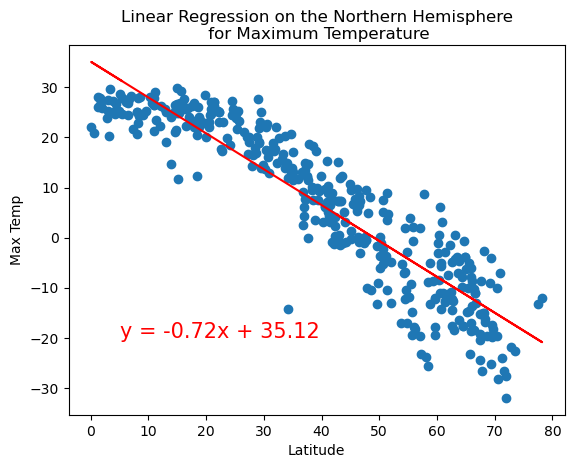

The p-value is: 0.000
The r-value is: -0.917


In [21]:
# Linear regression on Northern Hemisphere 
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))

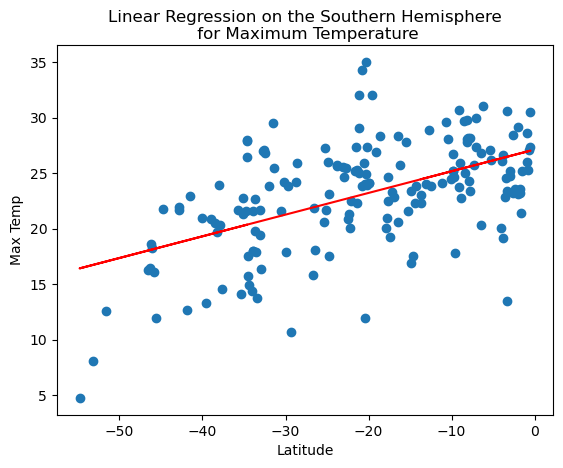

The p-value is: 0.000
The r-value is: 0.536


In [22]:
# Linear regression on Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

**Discussion about the linear relationship:
          - The linear regression for temperature Vs Latitude can be best fit for the data given both in northern and southern hemispher

### Humidity vs. Latitude Linear Regression Plot

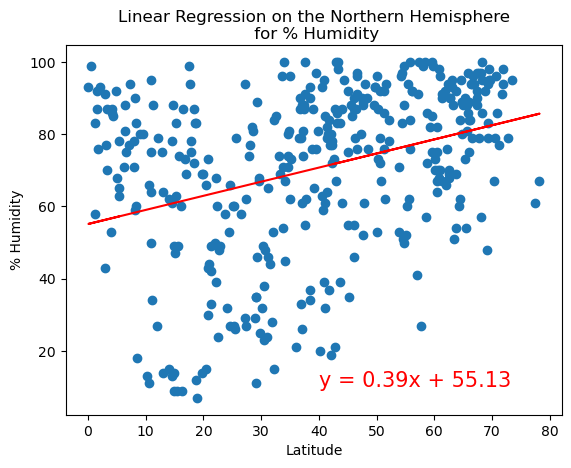

The p-value is: 0.000
The r-value is: 0.343


In [23]:
# Northern Hemisphere  
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

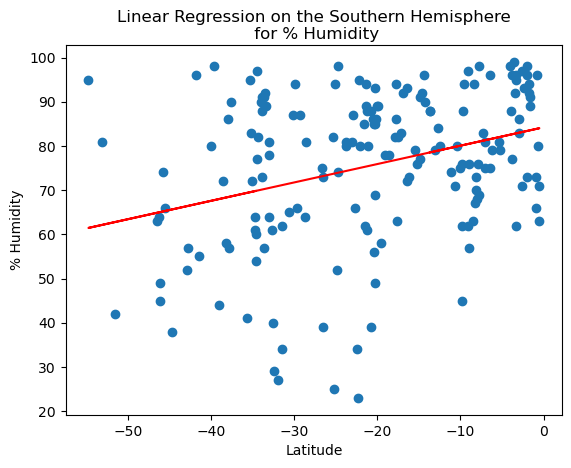

The p-value is: 0.000
The r-value is: 0.324


In [24]:
# Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

**Discussion about the linear relationship: - Another kind of regression has to be produced as linear regression is not best for 
the humidity Vs Latitude data in both hemisphers

### Cloudiness vs. Latitude Linear Regression Plot

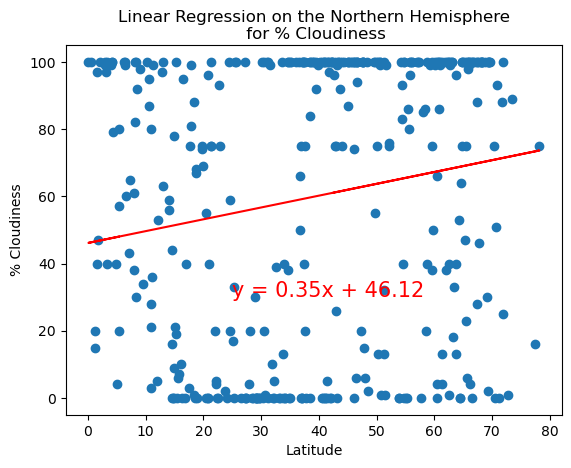

The p-value is: 0.001
The r-value is: 0.171


In [25]:
# Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

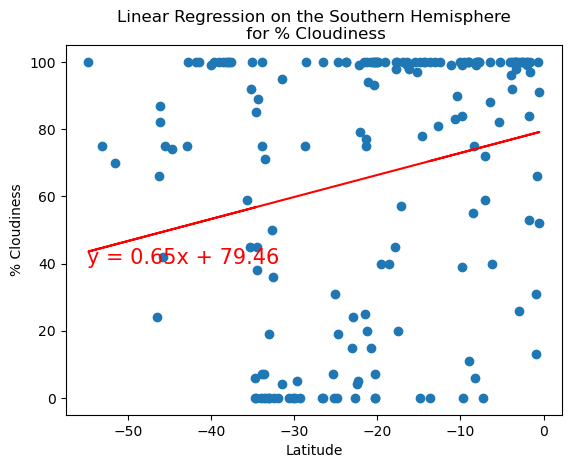

The p-value is: 0.003
The r-value is: 0.224


In [26]:
# Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

**Discussion about the linear relationship: - Linear regression is not best fit hence another regression needs to be produced for cloudness Vs Latitude in both hemisphers

### Wind Speed vs. Latitude Linear Regression Plot

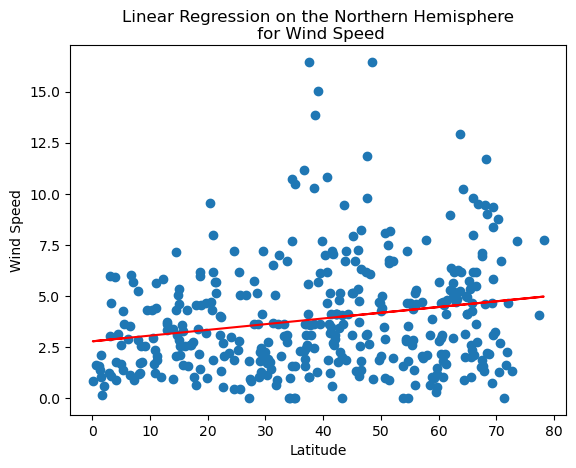

The p-value is: 0.000
The r-value is: 0.208


In [27]:
# Northern Hemisphere 
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

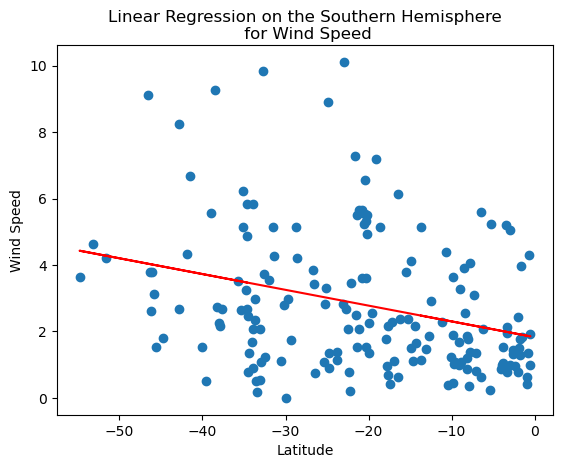

The p-value is: 0.000
The r-value is: -0.307


In [28]:
# Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))

**Discussion about the linear relationship:- Similarily linear regression is not best fit for wind speed data Vs Latitude in both hemisphers